# Lab1 Datahantering - Covid-19

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(category=FutureWarning, action="ignore")
warnings.filterwarnings(category=UserWarning, action="ignore")

### Uppgift 1:
- Read in "Veckodata Riket" sheet in Excel file.

In [4]:
covid = pd.read_excel("../Data/Folkhalsomyndigheten_Covid19.xlsx", sheet_name='Veckodata Riket')

#### Uppgift 1a:
- Doing initial analysis of the dataset:
- .head(), .info, .info(), .describe, shape() etc

In [5]:
covid.head(10)

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.000000,0,0.000000
1,2020,7,0,0,0,1,0,0,0,0,0.000000,0,0.000000
2,2020,8,0,0,0,1,0,0,0,0,0.000000,0,0.000000
3,2020,9,13,0,0,14,0,0,0,0,0.000000,0,0.000000
4,2020,10,211,2,2,225,2,3,3,0,0.000000,0,0.000000
5,2020,11,838,8,10,1063,10,16,19,5,0.500000,5,0.500000
6,2020,12,924,9,17,1987,19,88,107,44,4.300000,49,4.700000
7,2020,13,1957,19,28,3944,38,238,345,190,18.400000,239,23.100000
8,2020,14,3229,31,50,7173,69,277,622,451,43.700001,690,66.800003
9,2020,15,3740,36,67,10913,106,289,911,664,64.300003,1354,131.100006


In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

In [7]:
covid.describe

<bound method NDFrame.describe of        år  veckonummer  Antal_fall_vecka  Antal_fall_100000inv_vecka  \
0    2020            6                 1                           0   
1    2020            7                 0                           0   
2    2020            8                 0                           0   
3    2020            9                13                           0   
4    2020           10               211                           2   
..    ...          ...               ...                         ...   
137  2022           38              4669                          45   
138  2022           39             13532                         130   
139  2022           40              3999                          39   
140  2022           41              3408                          33   
141  2022           42              3279                          32   

     Antal_fall_100000inv_14dagar  Kum_antal_fall  Kum_fall_100000inv  \
0                           

In [8]:
rows, cols = covid.shape
print(f'Number of rows: {rows}\nNumber of cols: {cols}')

Number of rows: 142
Number of cols: 13


In [9]:
covid.columns

Index(['år', 'veckonummer', 'Antal_fall_vecka', 'Antal_fall_100000inv_vecka',
       'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv',
       'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade',
       'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka',
       'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv'],
      dtype='object')

In [10]:
covid.index

RangeIndex(start=0, stop=142, step=1)

#### Uppgift 1b:
- Slår ihop kolumnerna år och veckonummer till en kolumn med formatet 'ÅÅÅÅvVV'.

In [11]:
covid['år'] = covid['år'].astype(str)
covid['veckonummer'] = covid['veckonummer'].astype(str)
covid['Vecka'] = covid['år'] + "v" + covid['veckonummer']

# castar 'år' och 'veckonummer' till dtype 'int'
covid['år'] = covid['år'].astype(int)
covid['veckonummer'] = covid['veckonummer'].astype(int)

covid.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv,Vecka
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0,2020v6
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v7
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0,2020v8
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0,2020v9
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0,2020v10


#### Uppgift 1c/d/e/f i en 2x2 subplot:
- c: Linjediagram med antal avlidna per vecka.
- d: Linjediagram med antal fall per vecka.
- e: Linjediagram med antal avlidna per vecka och antal fall per vecka.

([<matplotlib.axis.XTick at 0x266cb7bcdd0>,
 [Text(1, 0, '2020v6'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

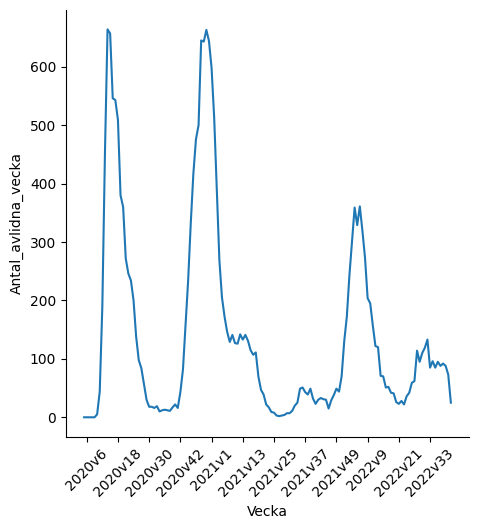

In [40]:
#sns.lineplot(x='Vecka', y='Antal_avlidna_vecka', data=covid)
sns.relplot(x='Vecka', y='Antal_avlidna_vecka', kind='line', data=covid)
loc, labels = plt.xticks()
#print(loc, labels)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

([<matplotlib.axis.XTick at 0x266cb617950>,
 [Text(1, 0, '2020v7'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

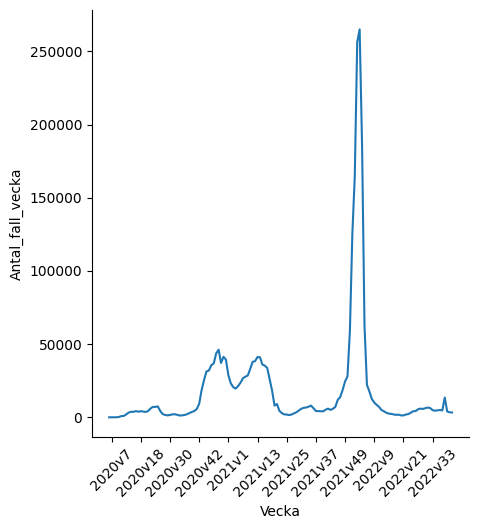

In [39]:
sns.relplot(x='Vecka', y='Antal_fall_vecka', kind='line', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

([<matplotlib.axis.XTick at 0x266c291bf10>,
 [Text(1, 0, '2020v7'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

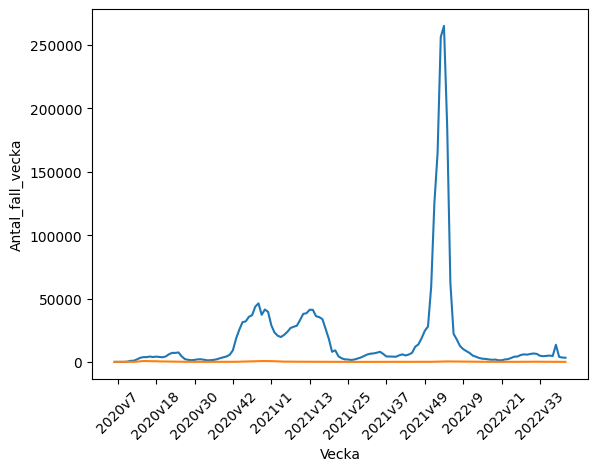

In [38]:
sns.lineplot(x='Vecka', y='Antal_fall_vecka', data=covid)
sns.lineplot(x='Vecka', y='Antal_avlidna_vecka', data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

([<matplotlib.axis.XTick at 0x266cb25d110>,
 [Text(1, 0, '2020v7'),
  Text(13, 0, '2020v18'),
  Text(25, 0, '2020v30'),
  Text(37, 0, '2020v42'),
  Text(49, 0, '2021v1'),
  Text(61, 0, '2021v13'),
  Text(73, 0, '2021v25'),
  Text(85, 0, '2021v37'),
  Text(97, 0, '2021v49'),
  Text(109, 0, '2022v9'),
  Text(121, 0, '2022v21'),
  Text(133, 0, '2022v33')])

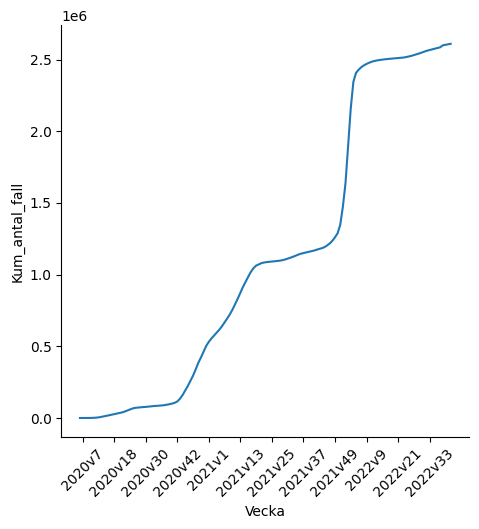

In [37]:
sns.relplot(x='Vecka', y='Kum_antal_fall', kind='line',data=covid)
plt.xticks(loc[1:-1:12], labels[0:-1:12], rotation=45)

#### Uppgift 4 - Bonusuppgift

[ECDC: Data on 14-day notification rate of new COVID-19 cases and deaths](https://www.ecdc.europa.eu/en/publications-data/data-national-14-day-notification-rate-covid-19)